making my own stability diagrams, r vs p

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#constants:
r_earth = 6371e3
sb_const = 5.67e-8
gas_const = 8314
G_const = 6.67e-11
kb_const = 1.38e-23
m_H = 1.67e-27

T_star = 2900
R_star = 0.141*695700e3
M_star = 0.1221*1.99e30
m_p_lower = 1.07*5.972e24
sep = 0.04856*1.5e11

ndof = 5
u_max = 1e3
bond = 0.9
bond_1 = 1-bond

In [3]:
pressure = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
mu_list = [1, 28.97]
mass_list = [m_p_lower, 10*5.972e24]

gamma = 1 + (2/ndof)
T_irr = T_star * (R_star/sep)**(1/2) * bond_1**(1/4)

In [4]:
def adv_rad(p, mu, m_p):
    cp = ((2 + ndof)*gas_const)/(2*mu)
    
    r_minus1 = (cp * u_max * p)/(sb_const * G_const * m_p)
    r_minus1 = r_minus1 * T_star**(-3) * R_star**(-3/2) * bond_1**(-3/4) * sep**(3/2)
    r = 1/r_minus1
    return r/r_earth

In [5]:
def adv_rad2(p, mu, m_p):
    m = mu*m_H
    cp = ((2 + ndof)*gas_const)/(2*mu)
    cs = ((gamma * kb_const * T_irr)/m)**(1/2)

    r_minus1 = (cp * cs * p)/(sb_const * G_const * m_p)
    r_minus1 = r_minus1 * T_star**(-3) * R_star**(-3/2) * bond_1**(-3/4) * sep**(3/2)
    r = 1/r_minus1
    return r/r_earth

In [6]:
def adv_rad3(p, mu, m_p):
    m = mu*m_H
    cp = ((2 + ndof)*gas_const)/(2*mu)

    r_minushalf = (gamma * kb_const/m)**(1/4) * ((cp * p)/(G_const * m_p * sb_const))**(1/2)
    r_minushalf = r_minushalf * T_star**(-5/4) * R_star **(-5/8) * bond_1**(-5/16) * sep **(5/8)
    r = 1/np.sqrt(r_minushalf)
    return r/r_earth

In [7]:
p_sat0 = {1:12.98, 28.97:34}
T_con0 = {1:108, 28.97:775}

def phase(mu):
    exp = (R_star * sep/2)**(1/2) * (T_star/T_con0[mu]) * bond_1**(1/4)
    p_lim = p_sat0[mu] * 1/np.exp(exp)
    if p_lim == 0:
        return p_sat0[mu]
    else:
        return p_lim

In [8]:
def hill_sphere(mp):
    rh = sep * (mp/(3*M_star))**(1/3)
    return rh/r_earth

In [9]:
r = adv_rad(1, 1, m_p_lower)
r2 = adv_rad2(1, 1, m_p_lower)
r3 = adv_rad3 (1, 1, m_p_lower)

print(r, r2, r3)

0.8835427385943917 0.5971252592403751 6.932033564865569e-06


12.98
34
12.98
34


<>:26: SyntaxWarning: invalid escape sequence '\o'
<>:26: SyntaxWarning: invalid escape sequence '\o'
C:\Users\heath\AppData\Local\Temp\ipykernel_1872\981828291.py:26: SyntaxWarning: invalid escape sequence '\o'
  fig.supylabel('R ($R_\odot$)')
C:\Users\heath\AppData\Local\Temp\ipykernel_1872\3131001052.py:6: RuntimeWarning: overflow encountered in exp
  p_lim = p_sat0[mu] * 1/np.exp(exp)
C:\Users\heath\AppData\Local\Temp\ipykernel_1872\981828291.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axs[0, 0].set_xlim(0, 100)


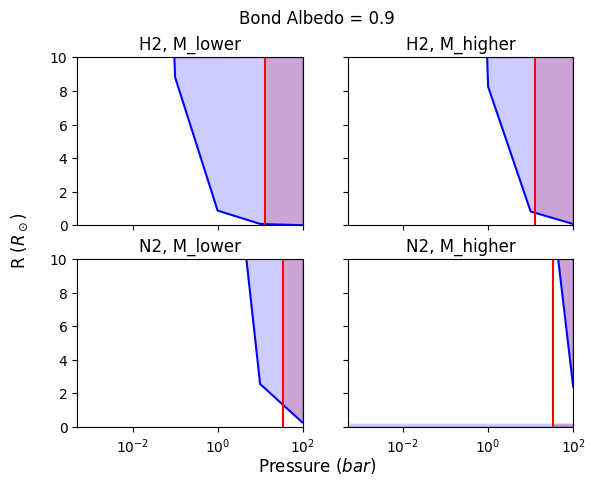

In [10]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
x = {0:(0, 0), 1:(1, 0), 2:(0, 1), 3:(1, 1)}

for i in range(0, 4):
    xi = x[i]
    ar = [adv_rad(p, mu_list[xi[0]], mass_list[xi[1]]) for p in pressure]
    phase_p = phase(mu_list[xi[0]])
    rh = hill_sphere(mass_list[xi[1]])
    print(phase_p)
    axs[xi].plot(pressure, ar, color='blue') #less than
    axs[xi].plot([phase_p, phase_p], [0, 10], color='red') #less than
    axs[xi].plot([pressure[0], pressure[-1]], [rh, rh], color='green') #less than
    axs[xi].fill_between([0, 100], [0, 10], facecolor='red', alpha=0.2, edgecolor='red')
    axs[xi].fill_betweenx([0, 10], [phase_p, phase_p], facecolor='white', edgecolor='white')
    axs[xi].fill_between([0, 100], [0, 10], facecolor='blue', alpha=0.2, edgecolor='blue')
    axs[xi].fill_betweenx(ar, pressure, facecolor='white', edgecolor='white')

axs[0, 0].set_title('H2, M_lower')
axs[0, 0].set_ylim(0,10)
axs[0, 0].set_xscale('log')
axs[0, 0].set_xlim(0, 100)
axs[0, 1].set_title('H2, M_higher')
axs[1, 0].set_title('N2, M_lower')
axs[1, 1].set_title('N2, M_higher')

fig.supylabel('R ($R_\odot$)')
fig.supxlabel('Pressure ($bar$)')
fig.suptitle('Bond Albedo = ' + str(bond))
plt.show()